# Exercise #2: Left Turn

Consider the intersection example to the right.
<img src=attachment:image.png align=right width=200/>

Synthesize intersection logic for the car with the                                                   following specification:

Desired Properties:
* Vehicle $a$ should eventually go to C9
* Vehicle $a$ does not collide with vehicle $h$ 
* Vehicle $h$ is not in the intersection when the light is red

Assumptions
* Find a set of “non-trivial” assumptions that render the problem realizable allow  human vehicle to start in any location

Constraints
* Vehicles can only move to cells representing their possible travel lanes
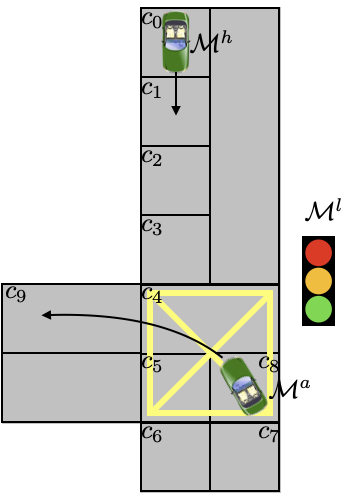

In [ ]:
from IPython.display import HTML
import animate

import tulip as tlp
from tulip import transys, abstract, spec, synth
import random

In [ ]:
# System definition
sys = tlp.transys.FTS()

sys.atomic_propositions.add_from({'a4', 'a7', 'a8', 'a9'})
sys.states.add('c4', ap={'a4'})
sys.states.add('c7', ap={'a7'})
sys.states.add('c8', ap={'a8'})
sys.states.add('c9', ap={'a9'})
sys.states.initial.add('c7')    # start in state c7

sys.transitions.add_comb({'c7'}, {'c7', 'c8'})
sys.transitions.add_comb({'c8'}, {'c8', 'c4'})
## Add remaining state transitions

In [ ]:
# Specifications for the environment

# Human vehicle dynamics
env_vars = {'vh': (2, 6)}
env_init = {'vh = 2'}
env_safe = {
    'vh = 2 -> next(vh) = 2 | next(vh) = 3',
    ## Add remaining human vehicle dynamics
}
env_prog = {'vh = 6'}

# Traffic light 
env_vars.update({'light': ["g", "y", "r"]})
env_init.update({'light = "g"'})
env_safe |= {
    'light = "g" -> next(light = "y")',
    ## Add remaining light dynamics
}

In [ ]:
# System variables and requirements
sys_vars = {}
sys_init = {}
sys_prog = {'a9'}
sys_safe = {'!(a4 & vh = 4)'}

specs = tlp.spec.GRSpec(env_vars, sys_vars, env_init, sys_init,
                        env_safe, sys_safe, env_prog, sys_prog)
specs.qinit = '\E \A'
specs.moore = True
print(specs.pretty())

In [ ]:
# Synthesize the controller
ctrl = tlp.synth.synthesize(specs, sys=sys)
assert ctrl is not None, 'unrealizable'
ctrl.plot()

In [ ]:
# Simulation
T = 10

# Pick an environmental signal
light_signal = [("g", "y", "r")[i % 3] for i in range(T)]
vh_signal = [2]
for b in range(1, T):
    vh_signal.append(random.choice([vh_signal[-1], vh_signal[-1]+1]) if vh_signal[-1] != 6 else 6)

time, states = ctrl.run('Sinit', {'light': light_signal, 'vh': vh_signal})

# Grab the location
va_path = states['loc']
vh_path = ['c'+str(i) for i in vh_signal]
light_path = light_signal

# Animate the results
anim = animate.animate_intersection(light_path, (va_path, vh_path))
HTML(anim.to_jshtml())

## Things to try
* Modify the specification to avoid running red lights
* Change the starting position of the human vehicle
* Change the starting location of the autonomous vehicle
* Allow the human vehicle to turn or to go straight